## Setup

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading the Data

In [39]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/tamil_offensive_full_dev.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/tamil_offensive_full_train.csv


--2023-10-18 13:21:32--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217900 (213K) [text/plain]
Saving to: ‘Test.csv.1’

Test.csv.1          100%[===================>] 212.79K  --.-KB/s    in 0.04s   

2023-10-18 13:21:33 (5.34 MB/s) - ‘Test.csv.1’ saved [217900/217900]

--2023-10-18 13:21:33--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [40]:
train_set = pd.read_csv("/content/train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv("/content/Test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)
fire_train_set = pd.read_csv("/content/tamil_offensive_full_train.csv",
                   names=["text","category"],
                   encoding = "utf-8",
                   engine = "python")

fire_test_set = pd.read_csv("/content/tamil_offensive_full_dev.csv",
                   names=["text","category"],
                   encoding = "utf-8",
                   engine = "python")



In [41]:
print("Train Dataset")
print(train_set.head(10))
print("\nInfo of Train Dataset\n")
print(train_set.info())

Train Dataset
      id                                               text category
0   tam1  திருமலை நாயக்கர் பேரவை சார்பாக படம் வெற்றி பெற...      NOT
1   tam2  இந்த ட்ரெய்லர் கூட பார்க்கிற மாதிரி இல்லை.. இத...      OFF
2   tam3  மைசூரு செட்டியார் சமூகத்தின் சார்பாக இப்படம் வ...      NOT
3   tam4  மொத்த சாதியும் ஒரு சாதிக்கு எதிரா நிக்குது.......      OFF
4   tam5                     only for விஜய் சேதுபதி and STR      NOT
5   tam6        உணமையாவே இது சைக்கோ படம் தான் ஒன்னுமே புரில      OFF
6   tam7  முத்தையா அண்ணனுக்கும் சாதி சாயம் பூசினார்கள் இ...      OFF
7   tam8  தமிழ்நாட்டில் மாற்று மொழி பேசும் அனைத்து மக்கள...      NOT
8   tam9  எங்களுக்கு மண்ணு பொண்ணு இரண்டுமே முக்கியம் அதி...      OFF
9  tam10  படம் அழகாக இருக்குங்க  அத விட எதார்த்தமாயிருக்...      NOT

Info of Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5877 n

In [42]:
print("Tset Dataset")
print(test_set.head(10))
print("\nInfo of Test Dataset\n")
print(test_set.info())

Tset Dataset
            id                                               text category
0   tam_test_1  தலைவா STR இதுக்குதான் கதுருந்தோம் மாஸ் தலைவா t...      NOT
1   tam_test_2  நாயுடு மக்கள் சார்பாக திரைப்படம் வெற்றி பெற வா...      NOT
2   tam_test_3                     தில்லானா முயற்சி  தஞ்சை கோனார்      NOT
3   tam_test_4  திரௌபதியின் துகிலுறித்த போது காத்த கண்ணனின் யா...      NOT
4   tam_test_5  நான் தியேட்டர்லே படம் பார்த்து 35 வருஷமாச்சு! ...      NOT
5   tam_test_6  கொங்கு வேளாளர் கவுண்டர்கள் சார்பாக படம் வெற்றி...      NOT
6   tam_test_7  திருநெல்வேலி நாடார் சார்பாக இந்த படம் வெற்றி அ...      NOT
7   tam_test_8  கயவர்களை துவம்சம் செய்ய , ஆண்டைகளின் மானம்  கா...      NOT
8   tam_test_9  சிங்கம் 3னு சொன்னாங்க ஆனா ஒரு சிங்கத்தையும் கா...      OFF
9  tam_test_10  *அன்பே சிவம்*எங்களது பார்வையில்  . பார்த்து பக...      NOT

Info of Test Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtyp

In [43]:
print("Fire Train Dataset")
print(fire_train_set.head(10))
print("\nInfo of Train Dataset\n")
print(fire_train_set.info())

Fire Train Dataset
                                                text       category
0                  movie vara level la Erika poguthu  Not_offensive
1  I love Ajith Kumar Vivegam movie inki mjy bht ...      not-Tamil
2          Padam nalla comedy padama irukum polaye..  Not_offensive
3  karthick subburaj anne .... intha padam vetri ...  Not_offensive
4  கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁  Not_offensive
5  ippo intha trailer ah parkuravana oru like pod...  Not_offensive
6  En thalaivan yogi babu irukkaar. Padam vera le...  Not_offensive
7         Nerkonda parvai...  Sema sema sema trailer  Not_offensive
8     ஏய் இது 96 யார் ஏமாத்தறீங்க? செம பின்னிட்டீங்க  Not_offensive
9  படம் கண்டிப்பாக வெற்றி பெற வேண்டும் செம்ம vara...  Not_offensive

Info of Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35139 entries, 0 to 35138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      35139 non-

In [44]:
fire_train_set.head(10)

,text,category
0,movie vara level la Erika poguthu,Not_offensive
1,I love Ajith Kumar Vivegam movie inki mjy bht ...,not-Tamil
2,Padam nalla comedy padama irukum polaye..,Not_offensive
3,karthick subburaj anne .... intha padam vetri ...,Not_offensive
4,கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁,Not_offensive
5,ippo intha trailer ah parkuravana oru like pod...,Not_offensive
6,En thalaivan yogi babu irukkaar. Padam vera le...,Not_offensive
7,Nerkonda parvai... Sema sema sema trailer,Not_offensive
8,ஏய் இது 96 யார் ஏமாத்தறீங்க? செம பின்னிட்டீங்க,Not_offensive
9,படம் கண்டிப்பாக வெற்றி பெற வேண்டும் செம்ம vara...,Not_offensive


In [45]:
print("Fire Tset Dataset")
print(fire_test_set.head(10))
print("\nInfo of Test Dataset\n")
print(fire_test_set.info())

Fire Tset Dataset
                                                text  \
0                  Handsome hunk  keri vaa thalaivaa   
1  தென்காசி மாவட்டம் நாடார் சமுதாயம் சார்பாக வாழ்...   
2  je vous aime bravo pour clip de merde que j éc...   
3  சிறப்பு..... மேலும் இது போன்ற படைப்புகள் மிக அ...   
4                Vera level BGM .. semma  trailer. 🤞   
5  என்னடா பண்ணி வச்சிருக்கீங்க ?!!!! அந்த அம்மாவ ...   
6  #kaappaan is gonna be a massive hit ,#suriya #...   
7             250k likes to go.....Yaralam waiting 🥰   
8  Supar annan trailar semmaya iruku i am waiting...   
9                         Maranam we Luv u Surya ann   

                          category  
0                    Not_offensive  
1                    Not_offensive  
2                        not-Tamil  
3                    Not_offensive  
4                    Not_offensive  
5  Offensive_Targeted_Insult_Group  
6                    Not_offensive  
7                    Not_offensive  
8                    Not_offensi

In [46]:
fire_test_set["category"].unique()
fire_test_set.drop(fire_test_set[ (fire_test_set['category'] == 'not-Tamil')].index, inplace=True)
fire_test_set["category"].replace("Not_offensive","NOT",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Individual","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Untargetede","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Other","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Group","OFF",inplace=True)

# train
fire_train_set["category"].unique()
fire_train_set.drop(fire_train_set[ (fire_train_set['category'] == 'not-Tamil')].index, inplace=True)
fire_train_set["category"].replace("Not_offensive","NOT",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Individual","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Untargetede","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Other","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Group","OFF",inplace=True)




In [47]:
fire_test_set["category"].unique()

array(['NOT', 'OFF'], dtype=object)

In [48]:
fire_train_set["category"].unique()

array(['NOT', 'OFF'], dtype=object)

In [49]:
train_set = train_set.sample(frac=1, random_state=1).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=1).reset_index(drop=True)
fire_train_set = fire_train_set.sample(frac=1, random_state=1).reset_index(drop=True)
fire_test_set = fire_test_set.sample(frac=1, random_state=1).reset_index(drop=True)
data = pd.concat([train_set, test_set,fire_train_set,fire_test_set], ignore_index=True)
data = data.drop(columns=['id'])
data.drop_duplicates(subset=['text'], inplace=True)

In [50]:
print("Full Dataset")
print(data.head(10))
print("\nInfo of Full Dataset\n")
print(data.info())



Full Dataset
                                                text category
0  வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...      NOT
1  அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...      OFF
2  அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...      OFF
3  எங்கள் சாதியின் குல தெய்வம்  திரௌபதி அம்மன் அர...      NOT
4  trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...      NOT
5  நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...      NOT
6  விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...      NOT
7  இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...      OFF
8  ஐங்குலத்தோர்  விஸ்வகுலம் சார்பாக படம் வெற்றியட...      NOT
9  1:33 ல இவ்வளவு அற்புதங்கள்  ஆஹா னு சொன்னா அது ...      NOT

Info of Full Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38214 entries, 0 to 44430
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      38214 non-null  object
 1   category  38214 non-null  object
dtypes: object(2)
memo

In [51]:
data['category'].value_counts()

NOT    28833
OFF     9381
Name: category, dtype: int64

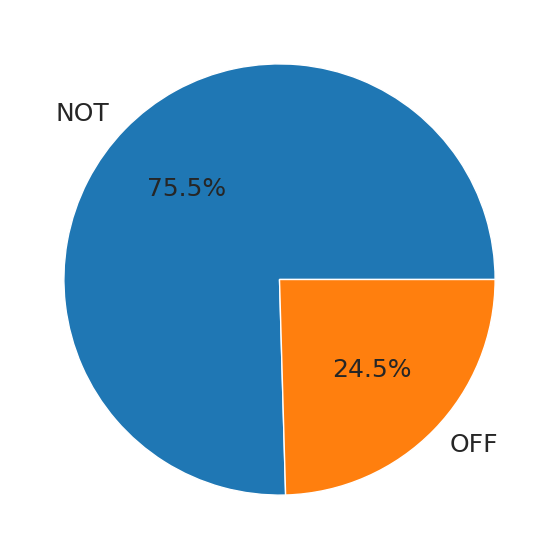

In [52]:
plt.pie(data['category'].value_counts(), labels=data['category'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Exploratory Data Analysis

In [53]:
lenght = len(data['text'][0])
print(f'Length of a sample commands: {lenght}')

Length of a sample commands: 72


In [54]:
data['Length'] = data['text'].str.len()
data.head(10)

,text,category,Length
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76


#### **Word Count**: Number of words in a review

In [55]:
word_count = data['text'][0].split()
print(f'Word count in a sample commands: {len(word_count)}')

Word count in a sample commands: 8


In [56]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [57]:
data['Word_count'] = data['text'].apply(word_count)
data.head(10)

,text,category,Length,Word_count
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209,20
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55,7
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62,6
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76,13


#### **Mean word length**: Average length of words

In [58]:
data['mean_word_length'] = data['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,text,category,Length,Word_count,mean_word_length
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13,6.384615
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209,20,9.500000
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55,7,7.000000
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62,6,9.333333
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76,13,4.846154


#### **Mean sentence length**: Average length of the sentences in the review

In [59]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['text'][0])])

72.0

In [60]:
data['mean_sent_length'] = data['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,text,category,Length,Word_count,mean_word_length,mean_sent_length
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13,6.384615,95.0
6,விழிப்புணர்வு குழந்தை பருவத்தில் இருந்தே பெற்ற...,NOT,209,20,9.500000,209.0
7,இத்தன பேரா? இவ்வளவு நாளா எங்கடா ஓழிஞ்சிட்டு இர...,OFF,55,7,7.000000,27.0
8,ஐங்குலத்தோர் விஸ்வகுலம் சார்பாக படம் வெற்றியட...,NOT,62,6,9.333333,62.0
9,1:33 ல இவ்வளவு அற்புதங்கள் ஆஹா னு சொன்னா அது ...,NOT,76,13,4.846154,76.0


In [61]:
import re

def contains_english_word(text):
    # Define a regular expression pattern to match English words
    pattern = r'\b[a-zA-Z]+\b'

    # Use re.search to find the first English word in the string
    match = re.search(pattern, text)

    # If a match is found, return True; otherwise, return False
    return bool(match)

# Assuming 'data' is your DataFrame with a 'text' column
data['isenglish'] = data['text'].apply(contains_english_word)


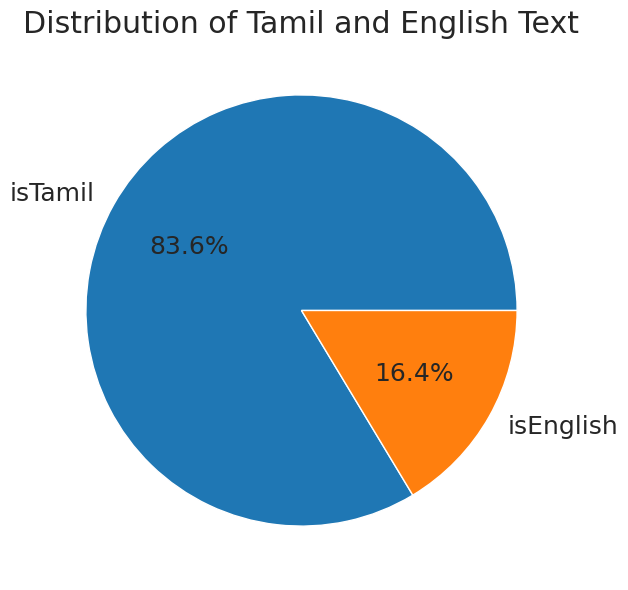

In [62]:
plt.pie(data['isenglish'].value_counts(), labels=["isTamil","isEnglish"], autopct='%1.1f%%')
plt.title('Distribution of Tamil and English Text')
plt.show()

In [63]:
data[data['isenglish']]

,text,category,Length,Word_count,mean_word_length,mean_sent_length,isenglish
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True
5,நான் சார்ந்த devendira குல வேளாளர் சமுதாயம் சா...,NOT,95,13,6.384615,95.0,True
16,Trailor வைத்து எதையும் முடிவு செய்து சண்டை போட...,NOT,137,16,7.625000,68.0,True
17,0:06 to 0:10 இந்த பகுதி போதும் படம் வேற லெவல்,NOT,45,9,4.111111,45.0,True
...,...,...,...,...,...,...,...
44426,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True
44427,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True
44428,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True
44429,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True


In [64]:
data["text"].isna().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize(col):
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[col], x=data['category'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1, 2, 2)
    sns.kdeplot(data[data['category'] == 'NOT'][col], label='NOT', shade=True)
    sns.kdeplot(data[data['category'] == 'OFF'][col], label='OFF', shade=True)
    plt.xlabel('')
    plt.ylabel('')

    plt.show()


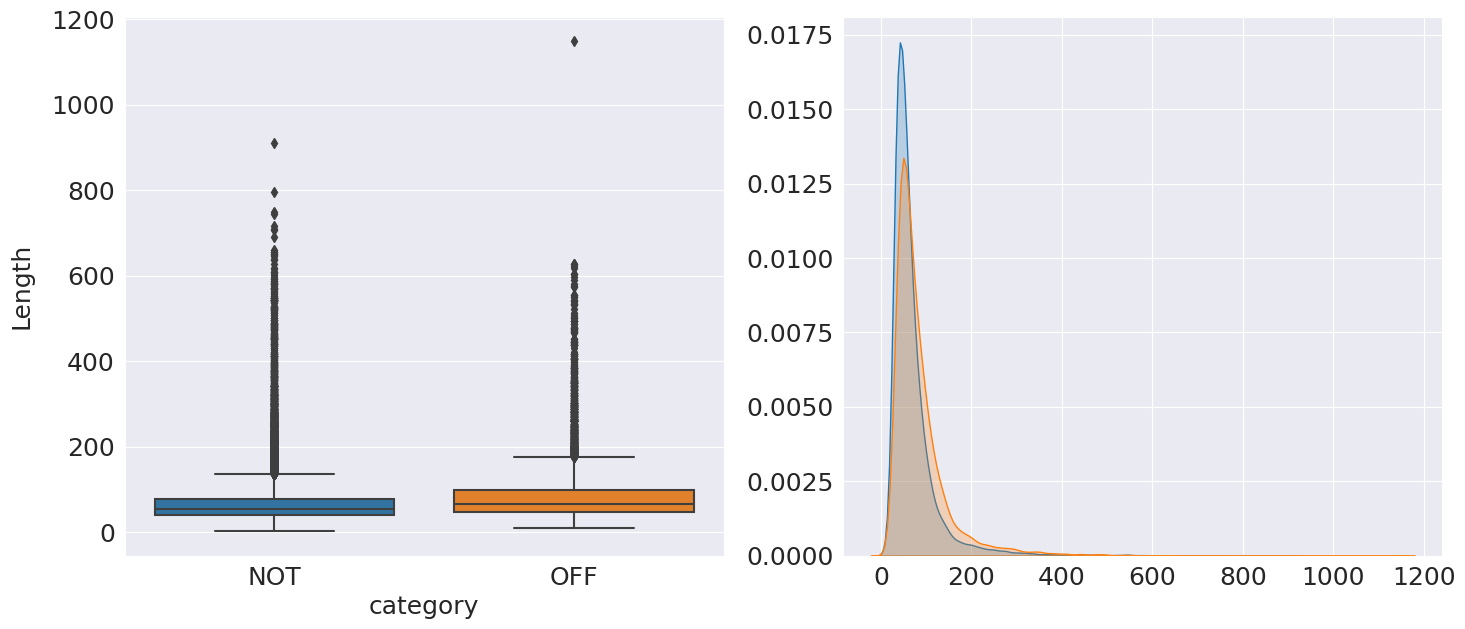

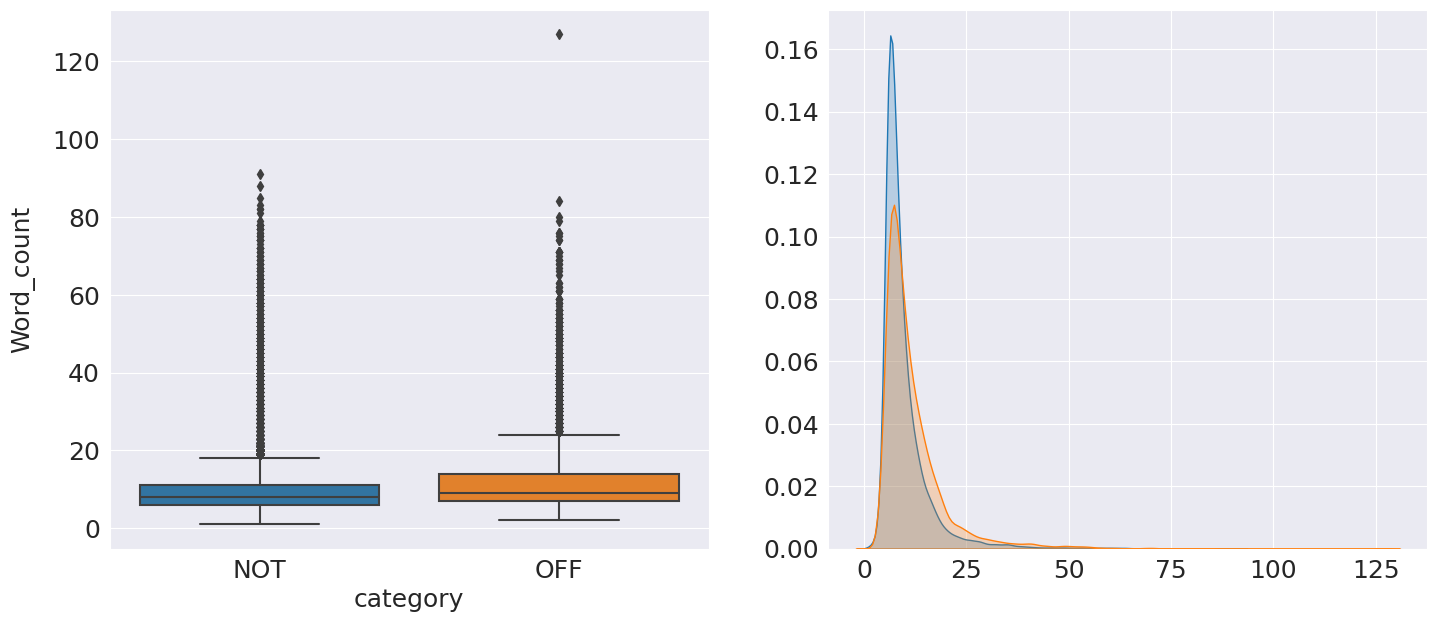

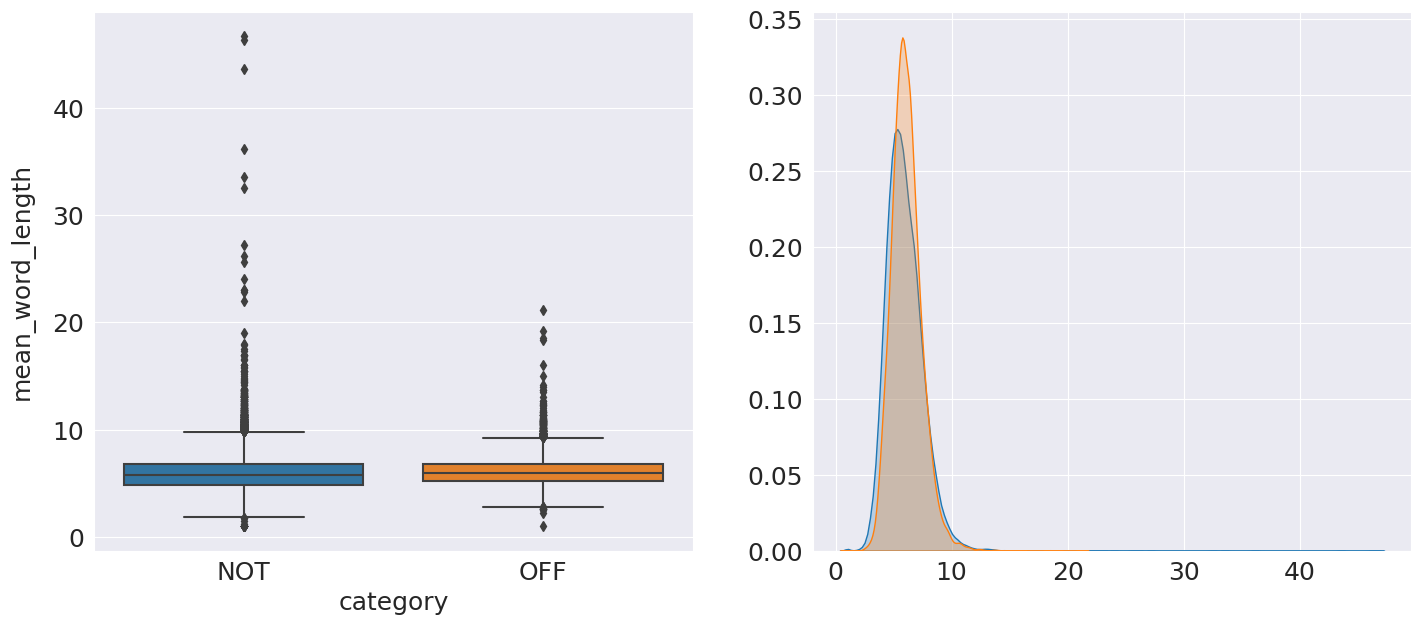

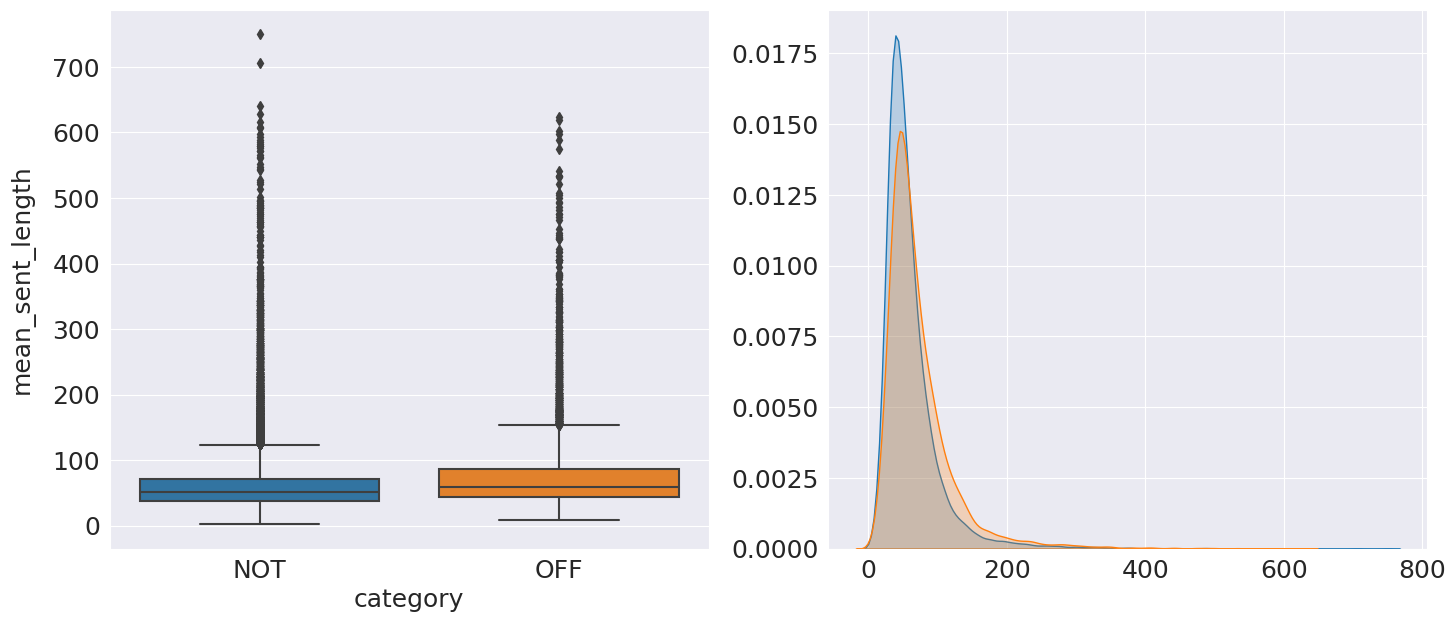

In [ ]:
features = data.columns.tolist()[2:6]

for feature in features:
    visualize(feature)

In [ ]:
df = data.copy()

In [ ]:
# data = data.drop(columns=features)
data.to_csv("Tamil_full_dataset",index=False)

# Translate

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=1d5001f46e520fbc1aa54ac7f891255af46cfdf940966c335a34c6b0b34be479
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [65]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.5 MB/s eta 0:00:00


In [69]:
import pandas as pd
import torch
import transformers

# தரவுத்தளத்தை ஏற்றவும்
# df = pd.read_csv("dataset.csv")

# மொழி மாதிரியை ஏற்றவும்
model = transformers.AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")
tokenizer = transformers.AutoTokenizer.from_pretrained("facebook/bart-base")




In [70]:

# உரை மொழிபெயர்க்க
def translate_to_tamil(text):
    inputs = tokenizer(text, return_tensors="pt").input_ids
    outputs = model.generate(inputs, max_length=1000)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# தரவுத்தளத்தை மொழிபெயர்க்க
for i in range(len(df)):
    if df.loc[i, "isenglish"] == True:
        df.loc[i, "text"] = translate_to_tamil(df.loc[i, "text"])

# மொழிபெயர்க்கப்பட்ட தரவுத்தளத்தை சேமிக்க

Token indices sequence length is longer than the specified maximum sequence length for this model (1075 > 1024). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
df.to_csv("translated_dataset.csv")

In [ ]:
from googletrans import Translator
import pandas as pd
from tqdm import tqdm
import re
# Define a function to translate English to Tamil
def translate_to_tamil(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='ta')
    return translated.text

In [ ]:

# Define a function to translate English text in the DataFrame
def translate_dataframe(row):
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')
    if bool(english_word_pattern.search(row)):
        translated_text = translate_to_tamil(row)
        return translated_text
    return row



In [ ]:
# cudf_df = cudf.DataFrame.from_pandas(df)
# Use tqdm to track progress while applying translation
tqdm.pandas(desc="Translate and Remove duplicates")
df['translate'] = df["text"].progress_apply(translate_dataframe)

Translate and Remove duplicates:   2%|▏         | 874/38214 [02:42<1:55:45,  5.38it/s]


TypeError: ignored

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda --version


--2023-10-18 12:58:55--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103219356 (98M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  98.44M   134MB/s    in 0.7s    

2023-10-18 12:58:56 (134 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [103219356/103219356]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | / - \ | / done
Executing transaction: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [ ]:
!conda install -c rapidsai-nightly -c nvidia -c conda-forge \
-c defaults cuml=21.12 python=3.7


Solving environment: / unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: \ unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - cuml=21.12

Current channels:

  - https://conda.anaconda.org/rapidsai-nightly/linux-64
  - https://conda.anaconda.org/rapidsai-nightly/noarch
  - https://conda.anaconda.org/nvidia/linux-64
  - https://conda.anaconda.org/nvidia/noarch
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



In [ ]:
import cudf


ModuleNotFoundError: ignored

In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.5 MB/s eta 0:00:00


In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("SnypzZz/Llama2-13b-Language-translate")
model = AutoModelForSeq2SeqLM.from_pretrained("SnypzZz/Llama2-13b-Language-translate")

OSError: ignored

In [2]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
article_en = "The head of the United Nations says there is no military solution in Syria"
model = MBartForConditionalGeneration.from_pretrained("SnypzZz/Llama2-13b-Language-translate")
tokenizer = MBart50TokenizerFast.from_pretrained("SnypzZz/Llama2-13b-Language-translate", src_lang="en_XX")

model_inputs = tokenizer(article_en, return_tensors="pt")

# translate from English to Hindi
generated_tokens = model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["hi_IN"]
)
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# => 'संयुक्त राष्ट्र के नेता कहते हैं कि सीरिया में कोई सैन्य समाधान नहीं है'

# translate from English to Chinese
generated_tokens = model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["zh_CN"]
)
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# => '联合国首脑说,叙利亚没有军事解决办法'


OSError: ignored